# <a id='toc1_'></a>[T23 State Space Control - Part 2](#toc0_)


**Table of contents**<a id='toc0_'></a>    
- [T23 State Space Control - Part 2](#toc1_)    
  - [Estimator Performance](#toc1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import requests as req, os

URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py"]

if not os.path.isfile(File[0]):
    print('Basic files not` found - downloading it')
    for dfile in File:
        if not os.path.isfile(dfile):
            print(dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()
else:
    print('Basic file found')
from basic_material import *

j = complex(0,1)

from control.matlab import tf, ss, ss2tf, step, place, rlocus, lqr, lsim, ssdata
from control_materials import *

Basic file found
Running Python: 3.12.8
Running Sympy: 1.13.3
Control Package Found
This is a library of basic functions for 16.06
This is a library of useful functions for the control systems in 16.06


## <a id='toc1_1_'></a>[Estimator Performance](#toc0_)

In [2]:
# system
a = np.array([[-1, 1.5],[1, -2]])
nx = a.shape[0]
b = np.array([1,0]).reshape(nx,1);
c = np.array([1, 0])
d = 0
G = ss(a,b,c,d)

# estimator poles
pe = np.array([-3, -4])
l = place(G.A.transpose(),G.C.reshape(nx,1),pe)
l = l.reshape(nx,1)

x0 = np.array([-0.5,-1]).reshape(nx,1);
xe = np.array([0,0]).reshape(nx,1);
X0 = np.vstack((x0, xe ))

t = np.arange(0,4,.01)

# input
Nwidth = min(np.argwhere(t>1.5))[0]
u = 0*t
u [0:Nwidth] = 1
u [Nwidth:2*Nwidth] = -1
u [3*Nwidth:4*Nwidth] = 1/2
u [4*Nwidth:5*Nwidth] = -1/2

#OL est
aol = np.vstack((np.hstack((G.A,np.zeros((nx,nx)))),np.hstack((np.zeros((nx,nx)),G.A))))
bol = np.vstack((G.B, G.B ))
col = np.hstack((G.C.reshape(1,nx), G.C.reshape(1,nx) ))
dol = 0
Gest_ol = ss(aol,bol,col,dol)

#CL est
acl = np.vstack((np.hstack((G.A,np.zeros((nx,nx)))),np.hstack((l*G.C,G.A - l*G.C))))
bcl = np.vstack((G.B, G.B ))
ccl = np.hstack((G.C.reshape(1,nx), G.C.reshape(1,nx) ))
dcl = 0
Gest_cl = ss(acl,bcl,ccl,dcl)

y_cl,t_cl,x_cl = lsim(Gest_cl,U=u,T=t,X0=X0)
y_ol,t_ol,x_ol = lsim(Gest_ol,U=u,T=t,X0=X0)


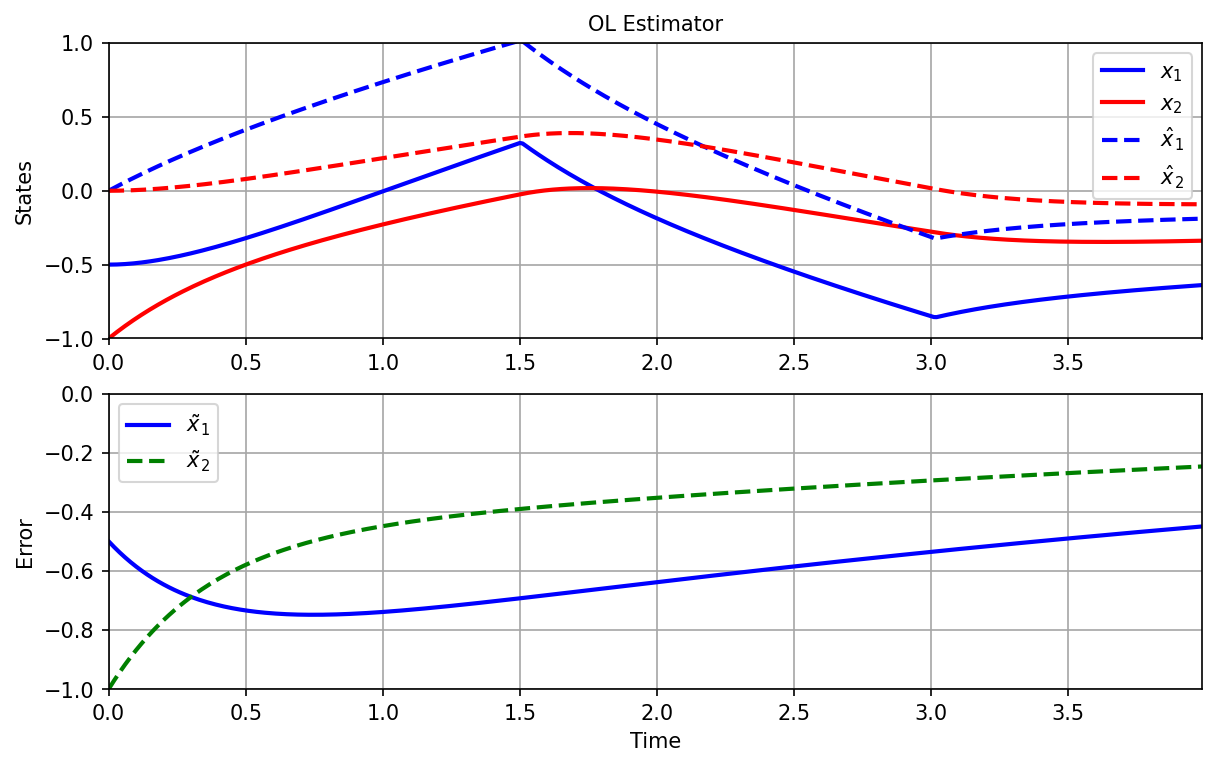

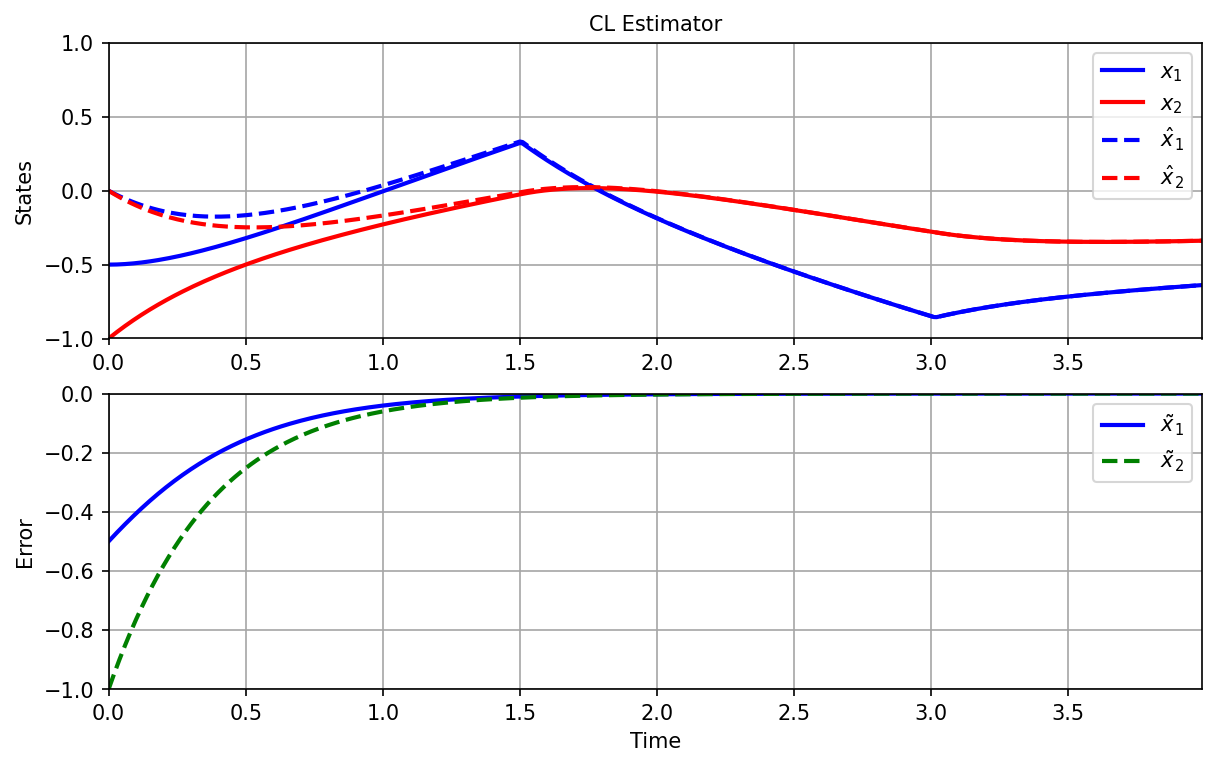

In [3]:
fig, ax = plt.subplots(2,1,figsize=(8, 5),dpi=150,constrained_layout = True)
ax[0].plot(t_ol,x_ol[:,0],'b',label=r'$x_1$')
ax[0].plot(t_ol,x_ol[:,1],'r-',label=r'$x_2$')
ax[0].plot(t_ol,x_ol[:,2],'b--',label=r'$\hat x_1$')
ax[0].plot(t_ol,x_ol[:,3],'r--',label=r'$\hat x_2$')
ax[1].plot(t_ol,x_ol[:,0]-x_ol[:,2],'b',label=r'$\tilde x_1$')
ax[1].plot(t_ol,x_ol[:,1]-x_ol[:,3],'g--',label=r'$\tilde x_2$')
ax[1].set_xlabel('Time')
ax[0].set_ylabel('States')
ax[1].set_ylabel('Error')
ax[0].grid(True, which="both", ls="-",color='0.65')
ax[1].grid(True, which="both", ls="-",color='0.65')
#ax[0].axhline(y=1,c='k',ls='--')
#ax[1].axhline(y=-180,c='k',ls='--')
ax[0].legend()
ax[1].legend()
ax[0].set_ylim(-1,1)
ax[1].set_ylim(-1,0)
ax[0].set_title("OL Estimator")
savefig("figs/Est_1.pdf", dpi=600)
plt.show()

fig, ax = plt.subplots(2,1,figsize=(8, 5),dpi=150,constrained_layout = True)
ax[0].plot(t_cl,x_cl[:,0],'b',label=r'$x_1$')
ax[0].plot(t_cl,x_cl[:,1],'r-',label=r'$x_2$')
ax[0].plot(t_cl,x_cl[:,2],'b--',label=r'$\hat x_1$')
ax[0].plot(t_cl,x_cl[:,3],'r--',label=r'$\hat x_2$')
ax[1].plot(t_cl,x_cl[:,0]-x_cl[:,2],'b',label=r'$\tilde x_1$')
ax[1].plot(t_cl,x_cl[:,1]-x_cl[:,3],'g--',label=r'$\tilde x_2$')
ax[1].set_xlabel('Time')
ax[0].set_ylabel('States')
ax[1].set_ylabel('Error')
ax[0].grid(True, which="both", ls="-",color='0.65')
ax[1].grid(True, which="both", ls="-",color='0.65')
#ax[0].axhline(y=1,c='k',ls='--')
#ax[1].axhline(y=-180,c='k',ls='--')
ax[0].legend()
ax[1].legend()
ax[0].set_ylim(-1,1)
ax[1].set_ylim(-1,0)
ax[0].set_title("CL Estimator")
savefig("figs/Est_2.pdf", dpi=600)
plt.show()